<a href="https://colab.research.google.com/github/valentinagliozzi/NNCourse/blob/main/PercCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy.io import loadmat

#get the dataset from github
!wget "https://github.com/valentinagliozzi/NNCourse/raw/main/cancer1.mat" -O "cancer.mat"

--2024-09-26 13:25:52--  https://github.com/valentinagliozzi/NNCourse/raw/main/cancer1.mat
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/valentinagliozzi/NNCourse/main/cancer1.mat [following]
--2024-09-26 13:25:52--  https://raw.githubusercontent.com/valentinagliozzi/NNCourse/main/cancer1.mat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61704 (60K) [application/octet-stream]
Saving to: ‘cancer.mat’

cancer.mat          100%[===================>]  60.26K  --.-KB/s    in 0.01s   

2024-09-26 13:25:53 (4.19 MB/s) - ‘cancer.mat’ saved [61704/61704]



In [8]:
#Functions' definitions



def percett(X, T, n):
    """
    Perceptron implementation.
    Classifies a set of patterns into two classes.
    Inputs are real and outputs are bipolar, 1, -1.
    There are m inputs plus the bias input, always set to -1.
    There are m+1 weights connecting the inputs and the bias to the single output y.
    The m+1 weights form a vector W, initially containing random values.
    The activation function is the sign.
    The input is a matrix X with m columns (one column per input),
    and t rows, where t is the number of patterns to learn.
    The patterns are m-dimensional.
    The input also includes the column vector T (target) with t rows,
    containing the values to learn (+1 or -1, identifying the two classes).
    n is the number of epochs set for learning.
    Usage: [a, b] = percett(X, T, n)
    a contains the history of weights and b the history of the number of learned patterns.
    """
    t, m = X.shape
    W = np.random.rand(m + 1)  # Random initialization of W
    X = np.hstack((X, -np.ones((t, 1))))  # Add bias input
    storiapesi = np.zeros((m + 1, n))
    storiappresi = np.zeros(n)

    for i in range(n):
        storiapesi[:, i] = W
        Y = np.sign(np.dot(W, X.T))  # Y is a row vector containing the t outputs
        storiappresi[i] = np.sum(T == Y)
        for j in range(t):
            if Y[j] != T[j]:
                W = W + T[j] * X[j, :]

    return storiapesi, storiappresi



def usaperc(W, P):
    """
    Uses the perceptron after the patterns have been learned.
    Receives W and a matrix of patterns P.
    Returns a column of responses, one for each pattern.
    """
    t, m = P.shape  # t patterns, m dimensions

    # Add a column of -1 to P for the bias term
    P = np.hstack((P, -np.ones((t, 1))))

    w = W.shape[0]

    if w != m + 1:
        raise ValueError("Incorrect dimensions!")

    # Calculate the result
    ris = np.sign(np.dot(W, P.T)).T
    return ris


In [9]:
# Load the data
cancer = sio.loadmat('cancer.mat')['cancer1'].astype(np.float64)



# Training pairs
cancer1i = cancer[1:350,1:9]
cancer1t = 2 * cancer[1:350,10] - 1

# Test pairs
cancer2i = cancer[351:699,1:9]
cancer2t = 2 * cancer[351:699, 10] - 1

In [10]:
# Set random seed
np.random.seed(1992)

# Learning
u, v = percett(cancer1i, cancer1t, 50)


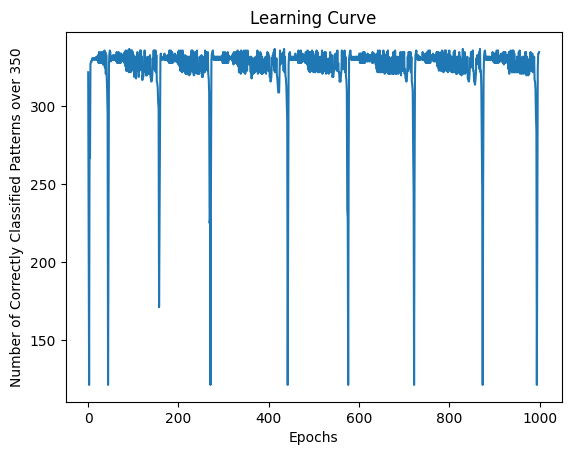

Percentage correctly learned during Training: 96.29%


In [11]:
# Plot the learning curve
plt.plot(v)
plt.title("Learning Curve")
plt.xlabel("Epochs")
plt.ylabel("Number of Correctly Classified Patterns over 350")
plt.show()

print(f"Percentage correctly learned during Training: {(np.max(v) / 350) * 100:.2f}%")

In [12]:
# Find the index of the first maximum
hh, h = np.max(v), np.argmax(v)

# Optimal weight row
W = u[:, h]

# Test
ris = usaperc(W, cancer2i)
z = np.sum(ris == cancer2t)

print(f"At Test, correct results on UNSEEN cancers:{z}, i.e., {(z / 349) * 100:.2f}%")

At Test, correct results on UNSEEN cancers:337, i.e., 96.56%
